In [11]:
from allrest.utils.nearestneighbors import get_nearest_neighbors

In [12]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np
from allrest.restree import *

In [22]:
N = 10
# xy = np.random.randint(low=0, high=N, size=(N, 2))
xy = np.array([[4, 2],
 [7, 8],
 [0, 6],
 [8, 9],
 [1, 2],
 [2, 9],
 [3, 5],
 [2, 9],
 [9, 7],
 [9, 4]])

In [23]:
x = xy[:, 0].tolist()
y = xy[:, 1].tolist()

In [24]:
xy = xy.tolist()

In [25]:
slack = np.random.randn(N) * 10E-12

In [26]:
slack[0] = np.min(slack[1:])

In [27]:
from allrest.rest.wrapper import run_rest

In [28]:
res = RES(run_rest([xy])[0])

In [29]:
from allrest.restree import *

In [30]:
pins = []
for i, (_x, _y, _s) in enumerate(zip(x, y, slack)):
    pins.append(Pin(i, i, _x, _y, 0, _s, i == 0, 0, 0, "", ""))

In [31]:
restree = RESTree(0, pins, res)

In [32]:
restree.initialize()

In [33]:
from allrest.utils.render import render_RESTree

In [34]:
render_RESTree(restree, "RESTree", "test.svg", None)

In [35]:
xy

[[4, 2],
 [7, 8],
 [0, 6],
 [8, 9],
 [1, 2],
 [2, 9],
 [3, 5],
 [2, 9],
 [9, 7],
 [9, 4]]

In [36]:
neighborslist = get_nearest_neighbors(x, y)
neighborslist

[[4, 9, 6, 1],
 [8, 2, 6, 0, 5, 3],
 [6, 4, 8, 1, 5],
 [7, 1, 8],
 [0, 6, 2, 5],
 [1, 2, 6, 4, 7],
 [9, 0, 4, 2, 8, 1, 5],
 [5, 2, 4, 3],
 [2, 6, 9, 0, 1, 3],
 [0, 6, 8, 1, 3]]

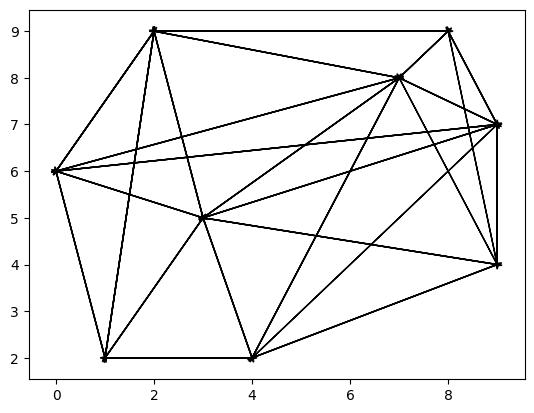

In [37]:
for n1, neighbors in enumerate(neighborslist):
    for n2 in neighbors:
        x_start = x[n1]
        y_start = y[n1]
        dx = x[n2] - x_start
        dy = y[n2] - y_start
        plt.arrow(x_start, y_start, dx, dy, head_width=0.05, head_length=0.1, fc='blue', ec='black')
    

In [38]:
xys = np.array([
    [3, 1, -50E-12],
    [1, 2, +50E-12],
    [2, 4, +50E-12],
    [6, 3, -50E-12],
    [5, 5, +50E-12],
    [2, 6, +50E-12],
    [6, 6, +50E-12]
])

In [39]:
xy = xys[:, :2].tolist()

In [40]:
xy

[[3.0, 1.0],
 [1.0, 2.0],
 [2.0, 4.0],
 [6.0, 3.0],
 [5.0, 5.0],
 [2.0, 6.0],
 [6.0, 6.0]]

In [41]:
ex_res = RES(run_rest([xy])[0])

In [42]:
ex_pins = []
for i, (_x, _y, _s) in enumerate(xys.tolist()):
    ex_pins.append(Pin(i, i, _x, _y, 0, _s, i == 0, 0, 0, "", ""))

In [43]:
ex_restree = RESTree(0, ex_pins, ex_res)

In [44]:
render_RESTree(ex_restree, "", "example.svg")

In [45]:
ex_res.RES

[[2, 1], [2, 0], [5, 2], [5, 4], [3, 4], [6, 4]]

In [46]:
x = xys[:, 0].tolist()

In [47]:
y = xys[:, 1].tolist()

In [48]:
neighborslist = get_nearest_neighbors(x, y)

In [49]:
x

[3.0, 1.0, 2.0, 6.0, 5.0, 2.0, 6.0]

In [50]:
y

[1.0, 2.0, 4.0, 3.0, 5.0, 6.0, 6.0]

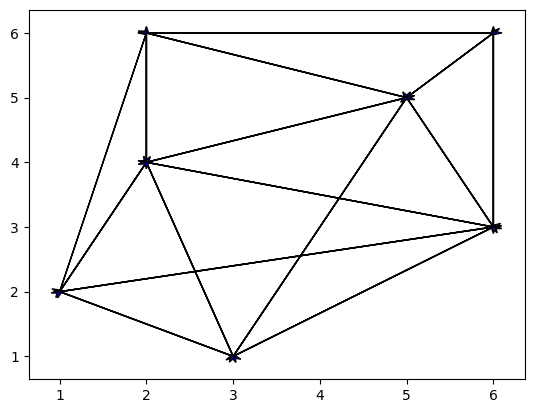

In [51]:
for n1, neighbors in enumerate(neighborslist):
    for n2 in neighbors:
        x_start = x[n1]
        y_start = y[n1]
        dx = x[n2] - x_start
        dy = y[n2] - y_start
        plt.arrow(x_start, y_start, dx, dy, head_width=0.05, head_length=0.1, fc='blue', ec='black')
    

In [52]:
neighborslist

[[1, 3, 2, 4],
 [0, 3, 2],
 [3, 1, 0, 4, 5],
 [1, 0, 2, 4, 6],
 [2, 3, 0, 5, 6],
 [4, 2, 1, 6],
 [5, 4, 3]]